In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<ipython-input-200-1cb269588ce9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='satisfaction_level', y='salary', inner='box', palette='Dark2')


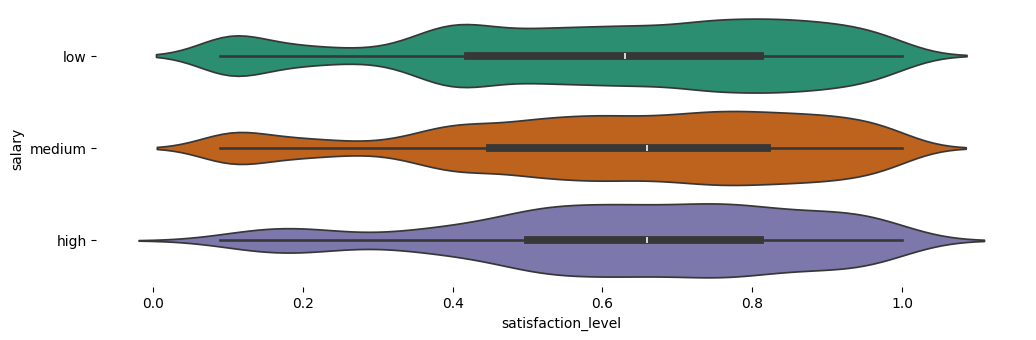

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='satisfaction_level', y='salary', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df['left'].dtype

dtype('int64')

In [ ]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='salary'>

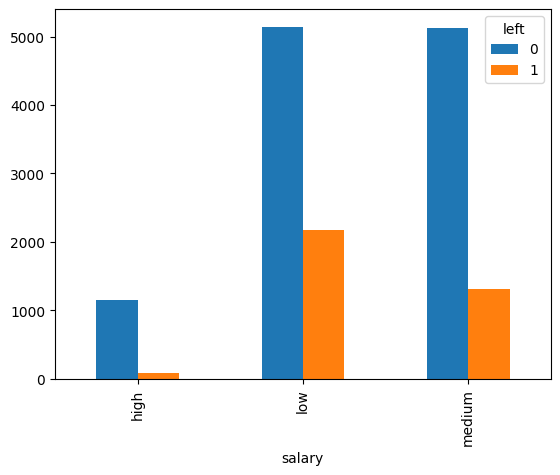

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

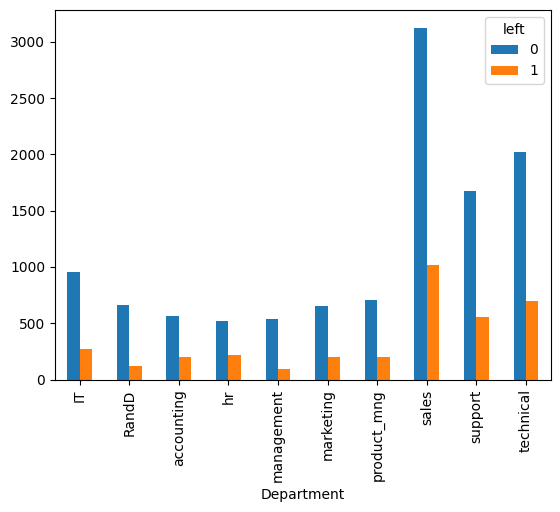

In [ ]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [ ]:
salary_dummies.reset_index(drop=True, inplace=True)

In [ ]:
merged_df = pd.concat([subdf, salary_dummies], axis=1)

In [ ]:
merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [ ]:
merged_df.drop('salary',axis='columns',inplace=True)
merged_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [ ]:
X = merged_df
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [ ]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.7794285714285715

In [12]:
n = int(input())
l = []
for p in range(n):
  info=input()
  l.append(info)
c = 0
for p in l:
  d = p[11:13]
  age=int(d)
  if(age>=60):
    c=c+1
    print(p[0:10])
print(c)


KeyboardInterrupt: Interrupted by user

In [1]:
n = int(input())
l = list(map(int,str(n)))
l.sort(reverse = True)
r = list(map(str,l))
print(''.join(r))

2345678
8765432


In [8]:
# prompt: sample input = ABC65D19HY09 sample output 34671011

def unique(n):
  l=[]
  while n > 0:
    r = n%10
    if r not in l:
      l.append(r)
    n = n//10
  return l
while True:
  try:
    s, e = map(int,input().split())
    break
  except ValueError:
    print("Invalid input. Please enter two integers.")

u = 0
for p in range (s,e+1):
  d = unique(p)
  for x in d:
    u=u+x
print(u)

Invalid input. Please enter two integers.


KeyboardInterrupt: Interrupted by user

In [26]:
s= input().split()
r=''
for p in range(len(s)):
  if(p!=len(s)-1):
    d=s[p][::-1]
    r=r+d+" "
  else:
    d=s[p][::-1]
    r=r+d
print(r)

the boy ran
eht yob nar


In [29]:
s=input()
mi=len(s)//2
m=s[mi]
fh=s[:mi]
sh=s[mi+l:]
f = fh.count(m)
s = sh.count(m)
if (f != 0) and (f == s):
    print("Balanced str:")
else:
    print("Not balanced")

KeyboardInterrupt: Interrupted by user

In [31]:
l=list(map(int,input().split()))
if(len(l)%2==0):
  mi=len(1)//2
  s=l[mi]+l[mi+l]
  del l[mi-l:mi+l]
  print(l)
  l.insert(mi-1,s)
  print(l)
else:
  print(l)


KeyboardInterrupt: Interrupted by user

In [ ]:
l=list(map(int,input().split()))
if(len%2)

In [32]:
s=input()
r =''
for p in s:
  if(p.isaplha()):
    r = r+p
r=r[::-1]
c=0
res=''
for p in s:
  if(p.isalpha()):
    res=res+r[c]
    c=c+1
else:
  res=res+p
  print(res)

SyntaxError: incomplete input (<ipython-input-32-02d7e60f1d7c>, line 4)